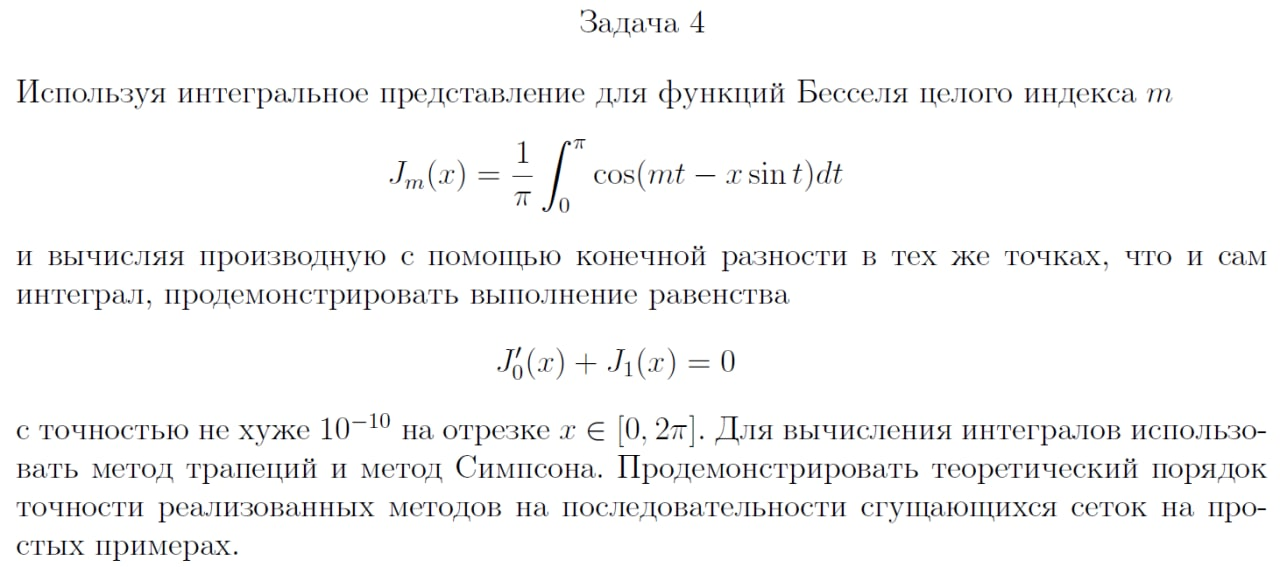

In [2]:
from math import cos,sin,pi
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import plotly.express as px

In [3]:
def bessel(m, t, x):
    return (1/np.pi)*np.cos(m*t - x*np.sin(t))

In [ ]:
def trap(a,b,n,m,x):
    h = (b - a) / n
    point = np.array([a + i * h for i in range(n + 1)])
    integr=0.5*(bessel(m,point[0],x)+bessel(m,point[n],x))
    for i in range(1, n):
        integr += bessel(m, point[i], x)
    return h*integr

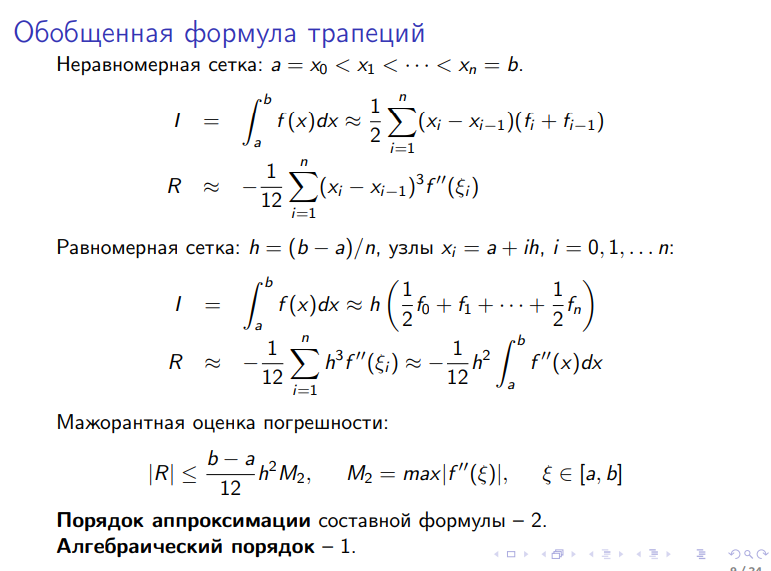

In [5]:
def simpson(a,b,n,m,x):
    h = (b - a) / (2*n)
    point = np.array([a + i * h for i in range(2*n + 1)])
    integr = 0
    for i in range(1, 2*n, 2):
        integr += bessel(m, point[i-1], x) + bessel(m, point[i+1], x) + 4*bessel(m, point[i], x) 
    return integr * h/3

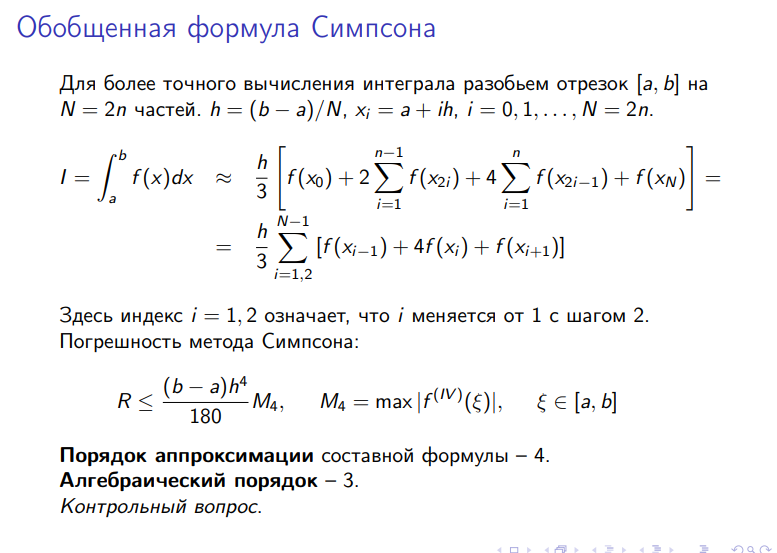

In [6]:
def diff(p1, p2, e):
    return (np.array(p1) - np.array(p2))/(2*e)

In [7]:
def trap_met(n,e,X):
    
    J_1 = [trap(0,np.pi,n,1,x) for x in X]
    J_0_1 = [trap(0,np.pi,n,0,x+e) for x in X]
    J_0_2 = [trap(0,np.pi,n,0,x-e) for x in X]
    J_0_diff = diff(J_0_1,J_0_2,e)
    return J_0_diff, J_1

In [8]:
def simpson_met(n,e,X):
    
    J_1 = [simpson(0,np.pi,n,1,x) for x in X]
    J_0_1 = [simpson(0,np.pi,n,0,x+e) for x in X]
    J_0_2 = [simpson(0,np.pi,n,0,x-e) for x in X]
    J_0_diff = diff(J_0_1,J_0_2,e)
    return J_0_diff, J_1

In [9]:
X = np.linspace(0, 2*np.pi, 1000)

  0%|          | 0/9 [00:00<?, ?it/s]

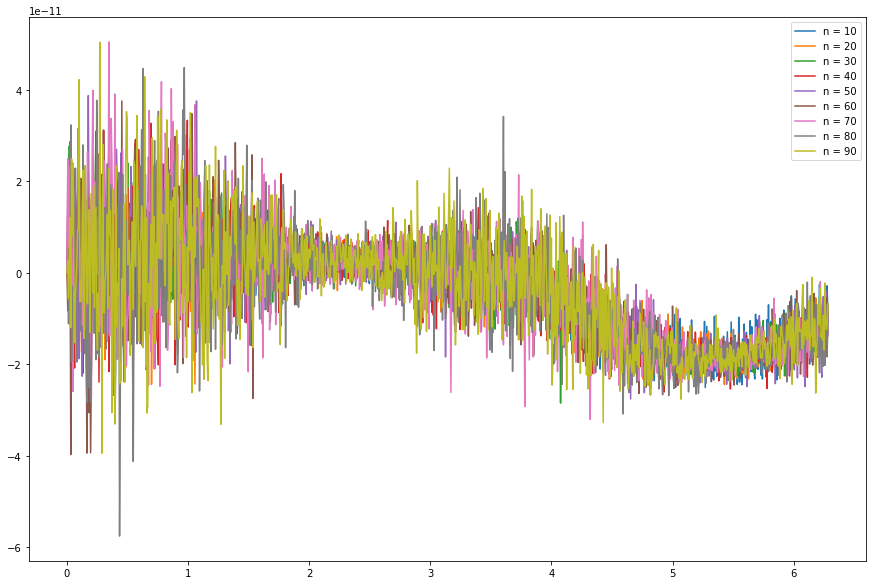

In [10]:
def check_trapeziod():
    plt.figure(figsize=(15, 10))
    X = np.linspace(0, 2 * np.pi, 1000)
    a, b = 0, np.pi
    e = 1e-5
    for n in tqdm(range(10, 100, 10)):
        k = trap_met(n,e,X)
        plt.plot(X,k[0]+k[1], label=f'n = {n}')
        
    plt.legend()
    #plt.ylim([1e-10, 0])
            
check_trapeziod()

  0%|          | 0/9 [00:00<?, ?it/s]

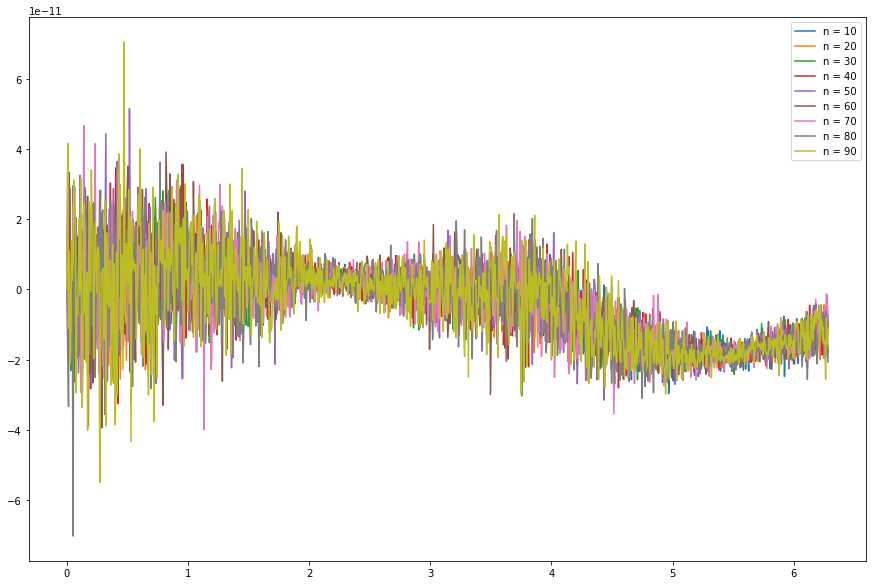

In [11]:
def check_simpson():
    plt.figure(figsize=(15, 10))
    X = np.linspace(0, 2 * np.pi, 1000)
    a, b = 0, np.pi
    e = 1e-5
    for n in tqdm(range(10, 100, 10)):
        k = simpson_met(n,e,X)
        plt.plot(X,k[0]+k[1], label=f'n = {n}')
        
    plt.legend()
            
check_simpson()

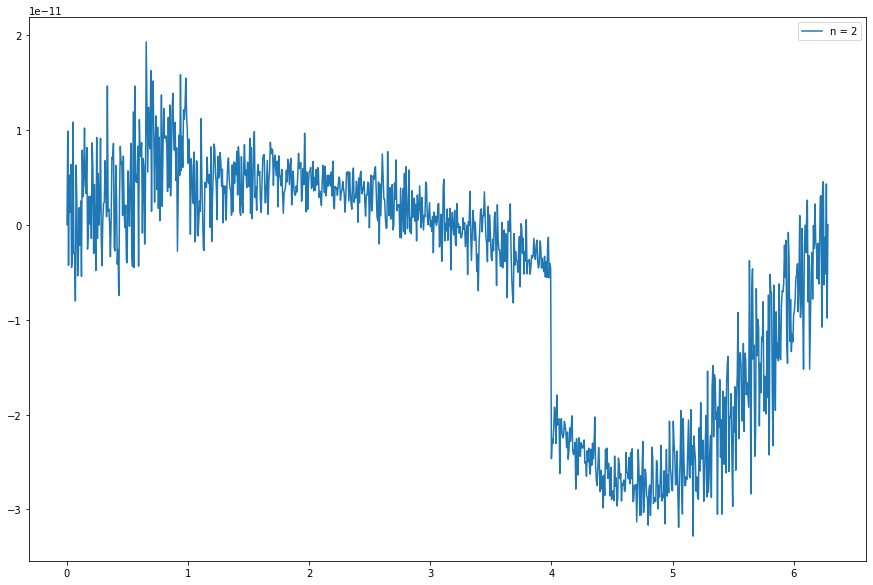

In [12]:
def check_trapeziod():
    plt.figure(figsize=(15, 10))
    X = np.linspace(0, 2 * np.pi, 1000)
    a, b = 0, np.pi
    e = 1e-5
    n = 2
    k = trap_met(n,e,X)
    plt.plot(X,k[0]+k[1], label=f'n = {n}')
        
    plt.legend()
    #plt.ylim([1e-10, 0])
            
check_trapeziod()

# Доп. задание:

In [10]:
def f(x):
    return x**(1/3) * np.exp(np.sin(x))

In [11]:
def trap_1(a,b,n):
    h = (b - a) / n
    point = np.array([a + i * h for i in range(n + 1)])
    integr=0.5*(f(point[0])+f(point[n]))
    for i in range(1, n):
        integr += f(point[i])
    return h*integr

In [12]:
def simpson_1(a,b,n):
    h = (b - a) / (2*n)
    point = np.array([a + i * h for i in range(2*n + 1)])
    integr = 0
    for i in range(1, 2*n, 2):
        integr += f(point[i-1]) + f(point[i+1]) + 4*f(point[i]) 
    return integr * h/3

In [13]:
a = abs(trap_1(0,1,100))
b = abs(trap_1(0,1,200))

np.log2(abs((1.295874008731708 - a)/(1.295874008731708 - b)))

1.318969102213258

In [34]:
a = abs(simpson_1(0,1,300))
b = abs(simpson_1(0,1,600))

np.log2(abs((1.295874008731708 - a)/(1.295874008731708 - b)))

1.3332115014723118

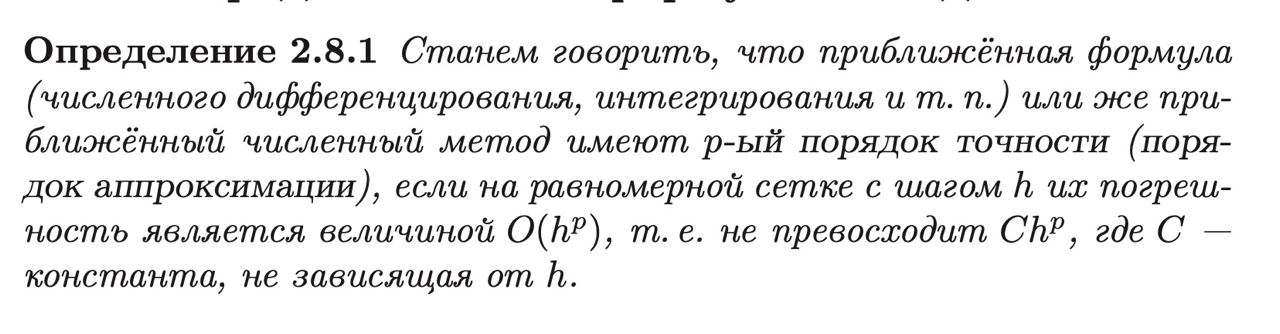

# Почему он рассходится и что можно сделать, чтобы все было нормально?

Первая производная
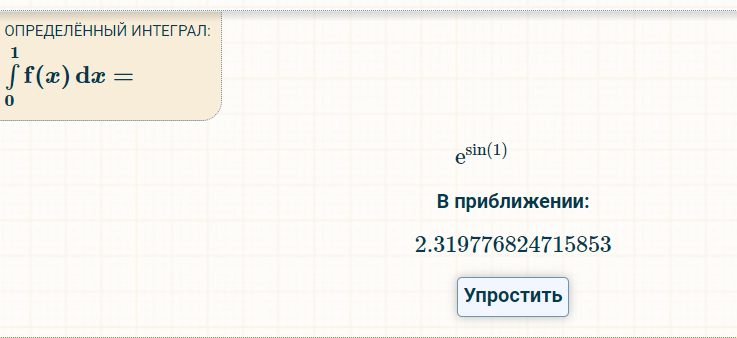

вторая производная
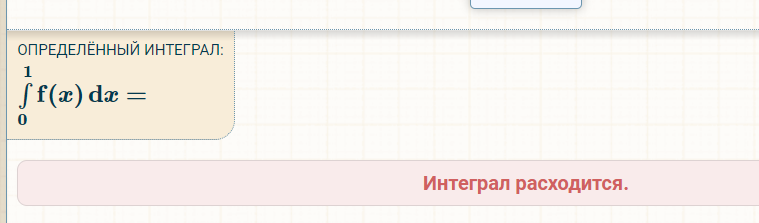

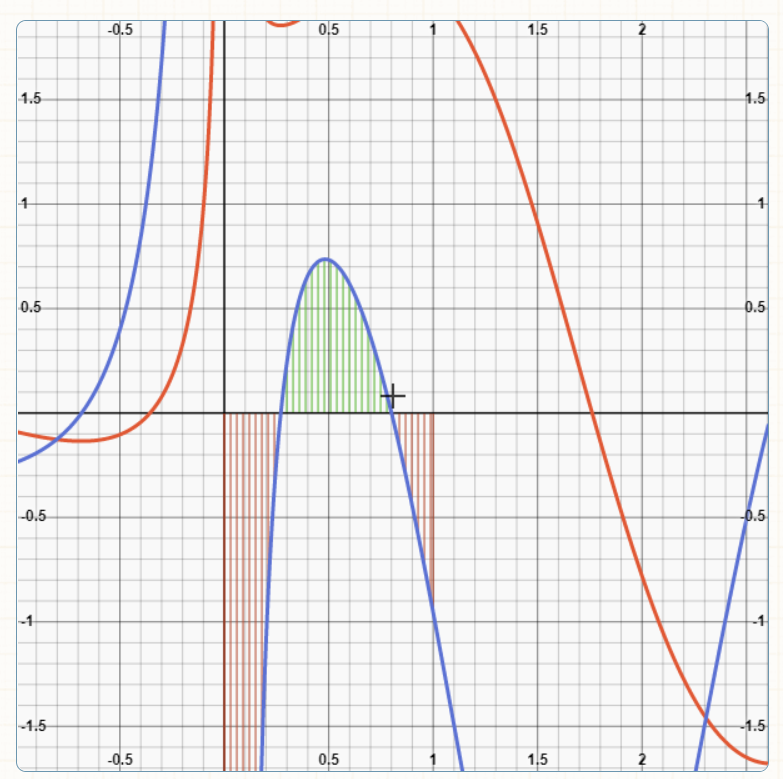

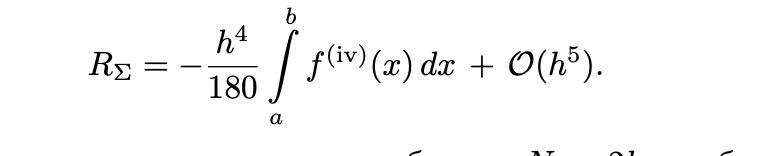

Попробуем поменять границы интегрирования, немножко отступив от нуля слева

In [34]:
a = abs(trap_1(0.1,1,50))
b = abs(trap_1(0.1,1,100))
c = abs(trap_1(0.1,1,200))
np.log2(abs((1.25900332998 - b)/(1.25900332998 - c)))

1.998759954259587

In [35]:
a = abs(simpson_1(0.1,1,50))
b = abs(simpson_1(0.1,1,100))
c = abs(simpson_1(0.1,1,200))
np.log2(abs((1.25900332998 - b)/(1.25900332998 - c)))

4.174520539640771